<a href="https://colab.research.google.com/github/goncalobv/ml-experiments/blob/main/Neural_networks_Learning_mathematical_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train a neural network to approximate mathematical functions
In this lab, we train a simple fully connected neural network to approximate 1D mathematical functions, such as the identity, square and cube.

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random


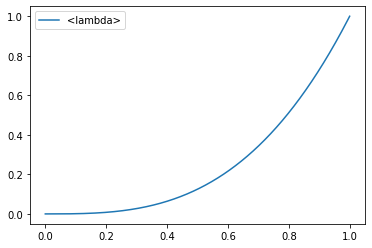

In [ ]:
# For reproducibility
np.random.seed(1)

identity = lambda x: x
square = np.square
cube = lambda x: np.power(x, 3)

def dataGen1D(num_samples, func):
  x = np.random.uniform(size=num_samples)
  x = np.sort(x)
  y = func(x)
  return x, y

train_samples = 100000
test_samples = 2000

func = cube

x_train, y_train = dataGen1D(train_samples, func)
x_test, y_test = dataGen1D(test_samples, func)

plt.plot(x_train, y_train, label=func.__name__)
plt.legend()


In [ ]:
def build_fc_model():
  fc_model = tf.keras.Sequential([
      tf.keras.layers.Dense(128, activation= 'relu'),
      tf.keras.layers.Dense(1, activation=None)
  ])
  return fc_model

model = build_fc_model()

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.MSE)

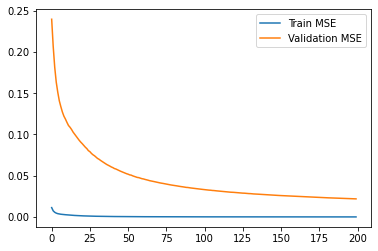

In [ ]:
BATCH_SIZE = 512
EPOCHS = 200

history_train = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=0, validation_split=0.2)

plt.plot(history_train.history['loss'], label='Train MSE')
plt.plot(history_train.history['val_loss'], label='Validation MSE')
plt.legend()


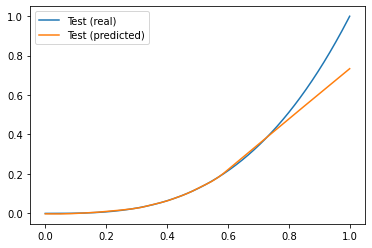

In [ ]:
predictions = model.predict(x_test)
plt.plot(x_test, y_test, label='Test (real)')
plt.plot(x_test, np.squeeze(predictions), label='Test (predicted)')
plt.legend()